In [36]:
import numpy as np
import librosa
import os
from os import walk
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import datetime 
import pandas as pd

**Fonctions pour l'extraction du vecteur de 12 valeurs**

In [37]:
def get_chroma_vector(wav_file_path, target_duration=3):
    y, sr = librosa.load(wav_file_path, sr=None)
  
    chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
    df_chroma = pd.DataFrame(chroma)
    moyenne_par_colonne = df_chroma.mean()
    # Sélectionnez les colonnes dont la moyenne est inférieure ou égale à 0.6
    colonnes_a_conserver = moyenne_par_colonne[moyenne_par_colonne <= 0.65].index

    # Créez un nouveau DataFrame en ne conservant que les colonnes sélectionnées
    df_filtered = df_chroma[colonnes_a_conserver]
    new_chroma = df_filtered.to_numpy()
    return new_chroma

In [38]:
def normalize_pcp(pcp):
    total_energy = np.sum(pcp)
    normalized_pcp = pcp / total_energy
    return normalized_pcp

In [39]:
def get_feature(file_path):
 # Extracting chroma vector feature
  chroma = get_chroma_vector(file_path)
  #norm_chroma= normalize_pcp(chroma)
  chroma_mean = chroma.mean(axis=1)

  feature = chroma_mean
  return feature

**Creation du Dataset**

In [40]:
def extract_features(directory):
    features = []
    labels = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            feature = get_feature(file_path)
            label = file.split('_')[1].split('.')[0]
            features.append(feature)
            labels.append(label)

    return features, labels

Network pour clean

In [41]:
dir = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\clean"
featuresClean, labelsClean = extract_features(dir)

In [42]:
permutations = np.random.permutation(len(featuresClean))

label_encoder = LabelEncoder()
labels_encodedC = label_encoder.fit_transform(labelsClean)

featuresC = np.array(featuresClean)[permutations]
labels_encodedC = np.array(labels_encodedC)[permutations]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(featuresC, labels_encodedC, test_size=0.2, random_state=42)

In [44]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.25)
opt2 = 'adam'

model = keras.Sequential()
model.add(keras.layers.Input(shape=(12,)))
model.add(keras.layers.Dense(35, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100


18/18 [==============================] - 1s 17ms/step - loss: 2.3093 - accuracy: 0.1161 - val_loss: 2.3347 - val_accuracy: 0.0750
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 2.3062 - accuracy: 0.1161 - val_loss: 2.3315 - val_accuracy: 0.1583
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 2.3031 - accuracy: 0.2179 - val_loss: 2.3284 - val_accuracy: 0.1583
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 2.3001 - accuracy: 0.2179 - val_loss: 2.3254 - val_accuracy: 0.1583
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 2.2970 - accuracy: 0.2179 - val_loss: 2.3224 - val_accuracy: 0.1583
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 2.2941 - accuracy: 0.2179 - val_loss: 2.3194 - val_accuracy: 0.1583
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 2.2912 - accuracy: 0.2179 - val_loss: 2.3165 - val_accuracy: 0.1583
Epoch 8/100
18/18 [=====

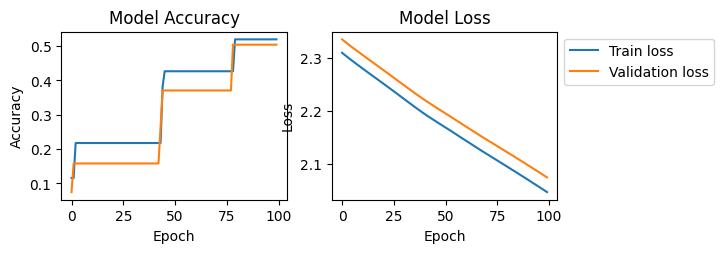

In [45]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.3)

plt.subplot(221)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(222)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [46]:
y_pred = model.predict(X_test)
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

count = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count+=1

string = "Performance : " + str(count/len(y_test)*100) + "%"
print(string)

7/7 [==============================] - 0s 2ms/step
Performance : 44.0%


In [47]:
dir = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav\noisy"
featuresNoisy, labelsNoisy = extract_features(dir)

In [48]:
permutations = np.random.permutation(len(featuresNoisy))

label_encoder = LabelEncoder()
labels_encodedN = label_encoder.fit_transform(labelsNoisy)

featuresN = np.array(featuresNoisy)[permutations]
labels_encodedN = np.array(labels_encodedN)[permutations]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(featuresN, labels_encodedN, test_size=0.2, random_state=42)

In [50]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.25)
opt2 = 'adam'

model = keras.Sequential()
model.add(keras.layers.Input(shape=(12,)))
model.add(keras.layers.Dense(35, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.3)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 2.3367 - accuracy: 0.0000e+00 - val_loss: 2.3414 - val_accuracy: 0.0000e+00
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 2.3341 - accuracy: 0.0000e+00 - val_loss: 2.3388 - val_accuracy: 0.0000e+00
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 2.3314 - accuracy: 0.0000e+00 - val_loss: 2.3362 - val_accuracy: 0.0000e+00
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 2.3287 - accuracy: 0.0000e+00 - val_loss: 2.3336 - val_accuracy: 0.0000e+00
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 2.3261 - accuracy: 0.0000e+00 - val_loss: 2.3310 - val_accuracy: 0.0000e+00
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 2.3235 - accuracy: 0.0000e+00 - val_loss: 2.3284 - val_accuracy: 0.0000e+00
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 2.3209 - accuracy: 0.0000e+00 - 

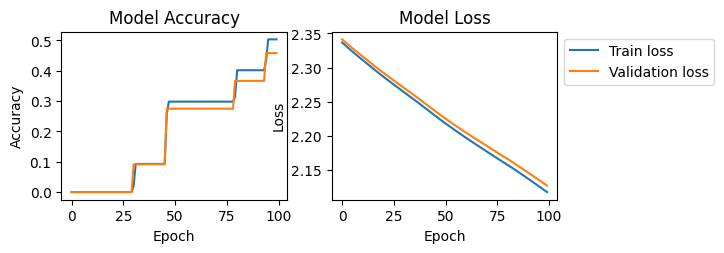

In [52]:
plt.subplot(221)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(222)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [53]:
y_pred = model.predict(X_test)
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

count = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count+=1

string = "Performance : " + str(count/len(y_test)*100) + "%"
print(string)

7/7 [==============================] - 0s 2ms/step
Performance : 54.0%


In [54]:
dir = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\chords_wav"
featuresTot, labelsTot = extract_features(dir)

In [55]:
permutations = np.random.permutation(len(featuresTot))

label_encoder = LabelEncoder()
labels_encodedT = label_encoder.fit_transform(labelsTot)

featuresT = np.array(featuresTot)[permutations]
labels_encodedT = np.array(labels_encodedT)[permutations]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(featuresT, labels_encodedT, test_size=0.2, random_state=42)

In [57]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.25)
opt2 = 'adam'

model = keras.Sequential()
model.add(keras.layers.Input(shape=(12,)))
model.add(keras.layers.Dense(35, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.3)

Epoch 1/100


70/70 [==============================] - 3s 14ms/step - loss: 2.3201 - accuracy: 0.2009 - val_loss: 2.3188 - val_accuracy: 0.1937
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 2.3080 - accuracy: 0.2067 - val_loss: 2.3070 - val_accuracy: 0.2458
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 2.2963 - accuracy: 0.2513 - val_loss: 2.2956 - val_accuracy: 0.2458
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 2.2849 - accuracy: 0.2513 - val_loss: 2.2843 - val_accuracy: 0.2458
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 2.2737 - accuracy: 0.2513 - val_loss: 2.2731 - val_accuracy: 0.2458
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 2.2625 - accuracy: 0.2513 - val_loss: 2.2621 - val_accuracy: 0.2458
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 2.2514 - accuracy: 0.2513 - val_loss: 2.2512 - val_accuracy: 0.2458
Epoch 8/100
70/70 [====

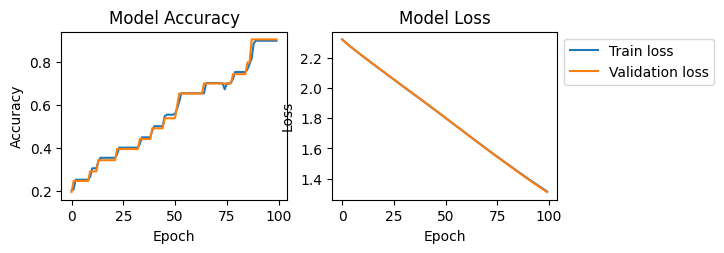

In [59]:
plt.subplot(221)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(222)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [60]:
y_pred = model.predict(X_test)
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

count = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count+=1

string = "Performance : " + str(count/len(y_test)*100) + "%"
print(string)

25/25 [==============================] - 0s 9ms/step
Performance : 88.875%


In [61]:
dir = r"C:\Users\lucie\Documents\Programmation\PFE_Analayse_musicale\Chords_generation\wav_autres"
featuresAutres, labelsAutres = extract_features(dir)

In [62]:
permutations = np.random.permutation(len(featuresAutres))

label_encoder = LabelEncoder()
labels_encodedA = label_encoder.fit_transform(labelsAutres)

featuresA = np.array(featuresClean)[permutations]
labels_encodedA = np.array(labels_encodedA)[permutations]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(featuresA, labels_encodedA, test_size=0.2, random_state=42)

In [64]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.25)
opt2 = 'adam'

model = keras.Sequential()
model.add(keras.layers.Input(shape=(12,)))
model.add(keras.layers.Dense(35, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.3)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.2566 - accuracy: 0.1250 - val_loss: 2.4346 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 72ms/step - loss: 2.2565 - accuracy: 0.1250 - val_loss: 2.4348 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 78ms/step - loss: 2.2564 - accuracy: 0.1250 - val_loss: 2.4349 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 67ms/step - loss: 2.2563 - accuracy: 0.1250 - val_loss: 2.4351 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 161ms/step - loss: 2.2563 - accuracy: 0.1250 - val_loss: 2.4352 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 90ms/step - loss: 2.2562 - accuracy: 0.1250 - val_loss: 2.4354 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 111ms/step - loss: 2.2561 - accuracy: 0.1250 - val_loss: 2.4356 - val_accuracy: 0.0000e+00

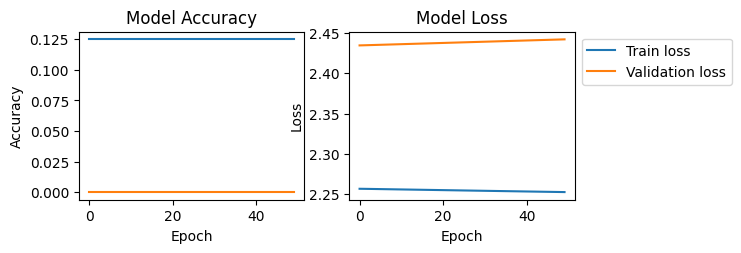

In [66]:
plt.subplot(221)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(222)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [67]:
import random

# Choisissez un exemple aléatoire dans l'ensemble de test
index = random.randint(0, len(X_test) - 1)
input_test = np.expand_dims(X_test[index], axis=0)  # Convertir en forme (1, num_features) pour une prédiction unique

# Faites la prédiction
prediction = model.predict(input_test)

classe = np.argmax(prediction)

taux_confiance = max(prediction[0]) * 100
predicted_accord_name = label_encoder.inverse_transform([classe])[0]

print(f'Prédiction de classe : {classe}')
print(f'Accord prédit : {predicted_accord_name}')
print(f'Taux de confiance : {taux_confiance}%')


1/1 [==============================] - 0s 115ms/step
Prédiction de classe : 2
Accord prédit : Bmin
Taux de confiance : 13.955114781856537%


In [68]:
y_pred = model.predict(X_test)
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

count = 0
for i in range(len(pred)):
    if pred[i] == y_test[i]:
        count+=1

string = "Performance : " + str(count/len(y_test)*100) + "%"
print(string)


1/1 [==============================] - 0s 122ms/step
Performance : 16.666666666666664%
